/Users/eteles/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


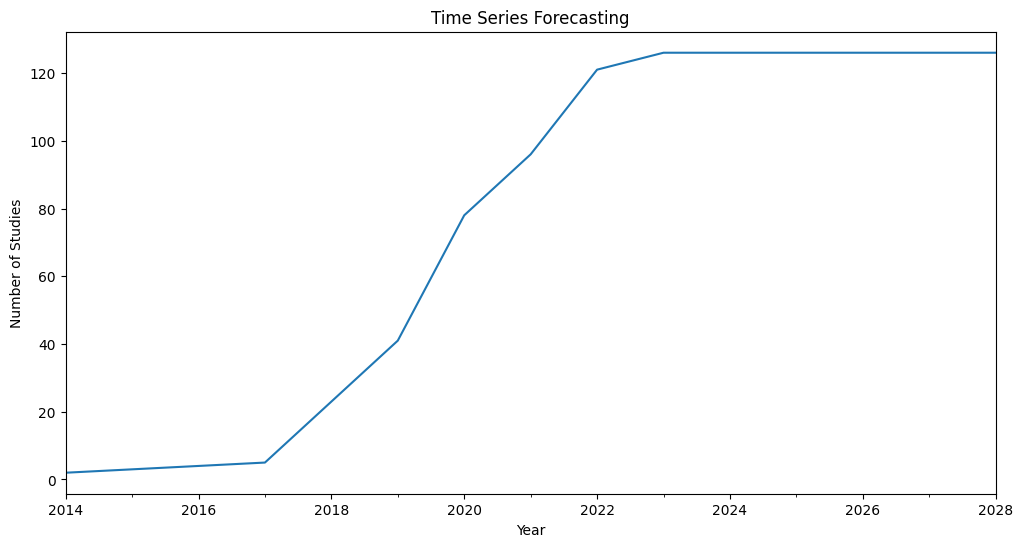

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the preprocessed data
data = pd.read_csv('preprocessed_clinical_trials_data.csv')

# Convert the "Study First Post Date" column to a DatetimeIndex
data['Study First Post Date'] = pd.to_datetime(data['Study First Post Date'])

# Set the "Study First Post Date" column as the index
data.set_index('Study First Post Date', inplace=True)

# Group the data by year and count the number of studies in each year
yearly_counts = data.resample('Y').size()

# Fit ARIMA model to the data
fit_model = ARIMA(yearly_counts, order=(5, 1, 0)).fit()

# Forecast future values
forecast_values = fit_model.forecast(steps=5)  # Change steps as needed for the number of forecasts

# Extend the time series data to include the forecasted values
extended_time_series = pd.concat([yearly_counts, pd.Series(forecast_values, index=pd.date_range(start=yearly_counts.index[-1], periods=6, freq='Y')[1:])])

# Plot the original time series, the fitted values, and the trend line
plt.figure(figsize=(12, 6))
extended_time_series.plot(title='Time Series Forecasting')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.show()


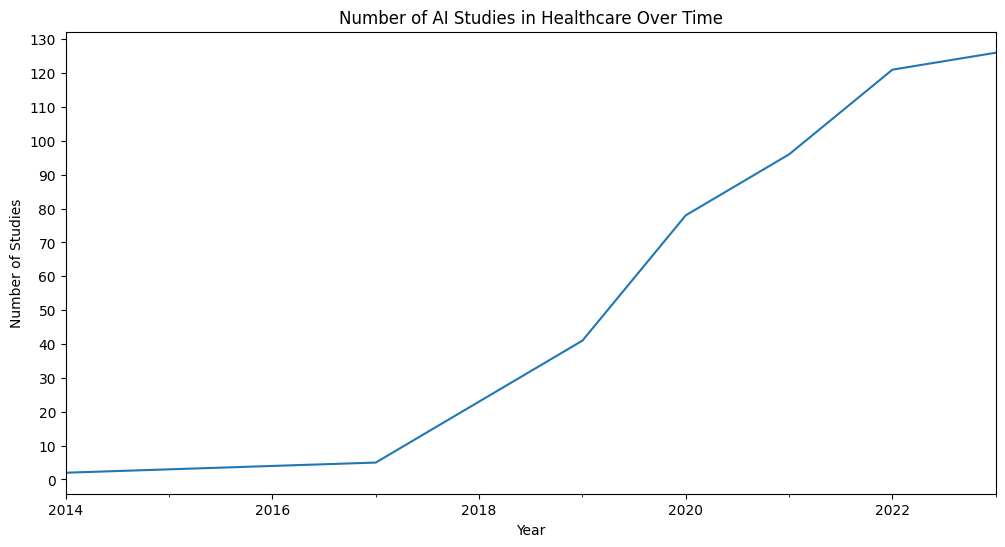

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed data
data = pd.read_csv('preprocessed_clinical_trials_data.csv')

# Convert the "Study First Post Date" column to a DatetimeIndex
data['Study First Post Date'] = pd.to_datetime(data['Study First Post Date'])

# Set the "Study First Post Date" column as the index
data.set_index('Study First Post Date', inplace=True)

# Group the data by year and count the number of studies in each year
yearly_counts = data.resample('Y').size()

# Calculate start and end years
start_year = yearly_counts.index.min().year
end_year = yearly_counts.index.max().year

# Plot the time series
plt.figure(figsize=(12, 6))
yearly_counts.plot(title='Number of AI Studies in Healthcare Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Studies')

# Set y-axis ticks
plt.yticks(range(0, max(yearly_counts.values) + 5, 10))

plt.show()

/Users/eteles/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


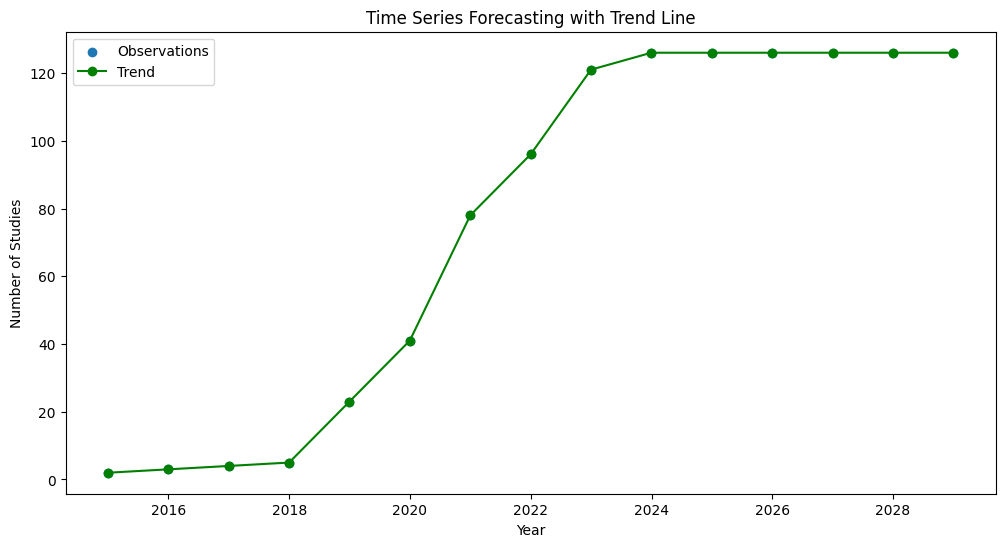

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the preprocessed data
data = pd.read_csv('preprocessed_clinical_trials_data.csv')

# Convert the "Study First Post Date" column to a DatetimeIndex
data['Study First Post Date'] = pd.to_datetime(data['Study First Post Date'])

# Set the "Study First Post Date" column as the index
data.set_index('Study First Post Date', inplace=True)

# Group the data by year and count the number of studies in each year
yearly_counts = data.resample('Y').size()

# Fit ARIMA model to the data
fit_model = ARIMA(yearly_counts, order=(5, 1, 0)).fit()

# Forecast future values
forecast_values = fit_model.forecast(steps=5)  # Change steps as needed for the number of forecasts

# Extend the time series data to include the forecasted values
extended_time_series = pd.concat([yearly_counts, pd.Series(forecast_values, index=pd.date_range(start=yearly_counts.index[-1], periods=6, freq='Y')[1:])])

# Plot the original time series with points and a line connecting them
plt.figure(figsize=(12, 6))
plt.scatter(extended_time_series.index, extended_time_series, label='Observations')
plt.plot(extended_time_series.index, extended_time_series, marker='o', linestyle='-', color='green', label='Trend')
plt.title('Time Series Forecasting with Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.legend()
plt.show()


In [9]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/c4/ef/c7a0349eec94535d37498a06c033dab2793fdfd7751d461ea3a47f4d23af/prophet-1.1.5-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/8c/7c/afa2f3165239cde7cf30d49ce3022082c4dc9e8af5d31d73b2b6f22a87f2/holidays-0.37-py3-none-any.whl.metadata
  Using cached holidays-0.37-py3-none-any.whl.metadata (21 kB)
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the preprocessed data
data = pd.read_csv('preprocessed_clinical_trials_data.csv')

# Convert the "Study First Post Date" column to a DatetimeIndex
data['Study First Post Date'] = pd.to_datetime(data['Study First Post Date'])

# Group the data by year and count the number of studies in each year
yearly_counts = data.resample('Y').size().reset_index()
yearly_counts.columns = ['ds', 'y']  # Prophet expects columns named 'ds' for dates and 'y' for values

# Initialize and fit Prophet model
model = Prophet()
model.fit(yearly_counts)

# Create future dates for prediction
future = model.make_future_dataframe(periods=5, freq='Y')  # Change periods as needed for the number of forecasts

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasting AI Studies in Healthcare')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

11:59:59 - cmdstanpy - INFO - Chain [1] start processing
11:59:59 - cmdstanpy - INFO - Chain [1] done processing
/Users/eteles/miniconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/eteles/miniconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


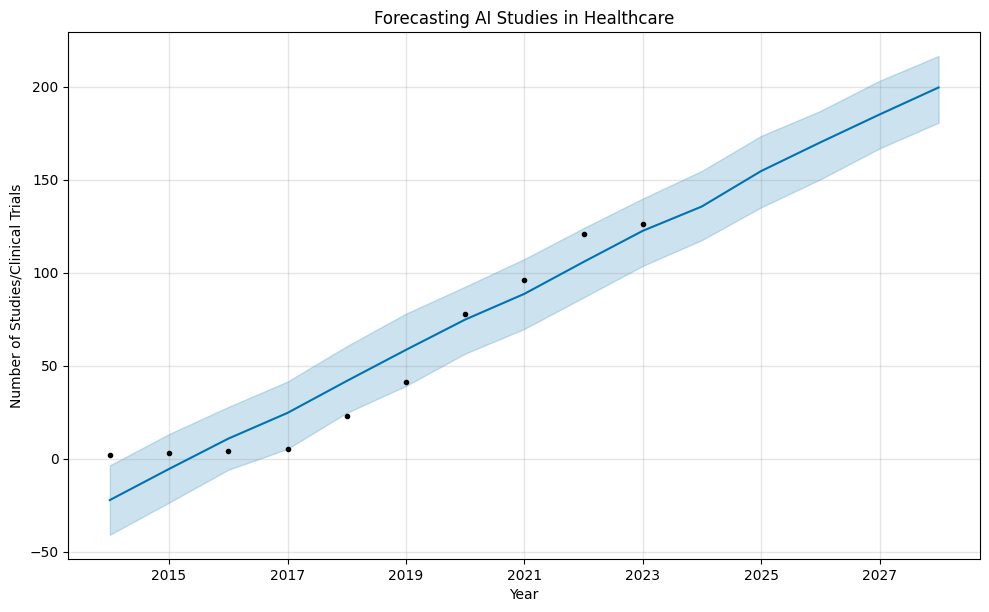

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the preprocessed data
data = pd.read_csv('preprocessed_clinical_trials_data.csv')

# Convert the "Study First Post Date" column to a DatetimeIndex
data['Study First Post Date'] = pd.to_datetime(data['Study First Post Date'])

# Group the data by year and count the number of studies in each year
yearly_counts = data.groupby(data['Study First Post Date'].dt.year).size().reset_index()
yearly_counts.columns = ['ds', 'y']  # Prophet expects columns named 'ds' for dates and 'y' for values

# Convert 'ds' column to datetime
yearly_counts['ds'] = pd.to_datetime(yearly_counts['ds'], format='%Y')

# Initialize and fit Prophet model
model = Prophet()
model.fit(yearly_counts)

# Create future dates for prediction
future = model.make_future_dataframe(periods=5, freq='Y')  # Change periods as needed for the number of forecasts

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasting AI Studies in Healthcare')
plt.xlabel('Year')
plt.ylabel('Number of Studies / Clinical Trials')
plt.show()
